In [1]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [2]:
X,Y = make_classification(n_samples=1000,
                          n_classes=2,
                          random_state=1)

In [3]:
#train test split
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.25,random_state=42)

In [4]:
#crearted a dummy model with default 0 as output
dummy_prob = [0 for _ in range(len(Y_test))]
dummy_prob

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [5]:
model = LogisticRegression()
model.fit(X_train,Y_train)

LogisticRegression()

In [6]:
#prediction based on probability
model_prob = model.predict_proba(X_test)

In [7]:
model_prob

array([[9.58372415e-04, 9.99041628e-01],
       [9.03115128e-01, 9.68848723e-02],
       [5.10856077e-01, 4.89143923e-01],
       [1.89954652e-01, 8.10045348e-01],
       [8.87464987e-01, 1.12535013e-01],
       [5.60264984e-01, 4.39735016e-01],
       [1.70482761e-01, 8.29517239e-01],
       [2.86383139e-01, 7.13616861e-01],
       [1.12335830e-01, 8.87664170e-01],
       [1.32031856e-01, 8.67968144e-01],
       [9.99456382e-01, 5.43617813e-04],
       [1.68869948e-01, 8.31130052e-01],
       [8.08974906e-01, 1.91025094e-01],
       [4.60945449e-01, 5.39054551e-01],
       [2.72160055e-01, 7.27839945e-01],
       [1.76358744e-01, 8.23641256e-01],
       [6.14806190e-02, 9.38519381e-01],
       [3.61787582e-01, 6.38212418e-01],
       [8.89918555e-01, 1.10081445e-01],
       [7.58820769e-01, 2.41179231e-01],
       [9.88419575e-01, 1.15804251e-02],
       [5.09977957e-01, 4.90022043e-01],
       [1.11824236e-01, 8.88175764e-01],
       [2.05065857e-03, 9.97949341e-01],
       [8.630852

In [8]:
#lets focus on positive outcome
model_prob = model_prob[:,1]

In [9]:
dummy_model_auc = roc_auc_score(Y_test,dummy_prob)
model_auc = roc_auc_score(Y_test,model_prob)
print(dummy_model_auc)
print(model_auc)

0.5
0.9108885464817668


In [14]:
#RocAuc depends on FPR Xaxis and TPR - yAxis

#calculate ROC curves
dummy_fpr, dummy_tpr, _ = roc_curve(Y_test,dummy_prob)
model_fpr, model_tpr, thresholds = roc_curve(Y_test,model_prob)

In [15]:
thresholds

array([           inf, 9.99738592e-01, 9.87040875e-01, 9.86379569e-01,
       9.57807758e-01, 9.57072190e-01, 9.45358918e-01, 9.40467971e-01,
       9.28352122e-01, 9.27301113e-01, 9.25546499e-01, 9.23675753e-01,
       8.94689922e-01, 8.93893406e-01, 8.43433686e-01, 8.38350348e-01,
       8.28678141e-01, 8.26515102e-01, 8.08619980e-01, 8.06380714e-01,
       7.80387324e-01, 7.64061119e-01, 7.63865215e-01, 7.63295056e-01,
       7.58516782e-01, 7.55239387e-01, 7.52535126e-01, 7.47974480e-01,
       7.23463245e-01, 7.22944858e-01, 6.74522461e-01, 6.56742619e-01,
       6.55332712e-01, 6.26800183e-01, 5.99853807e-01, 5.57961256e-01,
       5.39054551e-01, 5.14148751e-01, 5.05106145e-01, 4.96241078e-01,
       4.90022043e-01, 4.84956016e-01, 4.69101337e-01, 4.50840890e-01,
       4.46447154e-01, 4.39735016e-01, 4.24228884e-01, 3.24445069e-01,
       3.12824361e-01, 3.06577477e-01, 3.01384481e-01, 2.10359803e-01,
       2.06155010e-01, 1.91025094e-01, 1.69812812e-01, 1.42728321e-01,
      

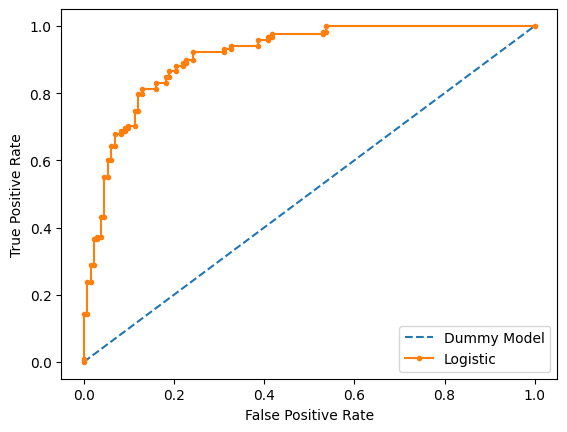

In [13]:
import matplotlib.pyplot as plt
plt.plot(dummy_fpr,dummy_tpr, linestyle='--',label='Dummy Model')
plt.plot(model_fpr,model_tpr,marker='.',label='Logistic')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend()
plt.show()

In [16]:
#orange line represents the logistic regression
#the entire area is the "area under the curve" is the logistic regression model

#blue line dummy model

#Area of the logistic regression model is greater than area of the dummy model

#based on the threshold values we will calculate TPR and FPR

#wherever there is high TPR and less FPR will capture that particular point and that point is a threshold value selected

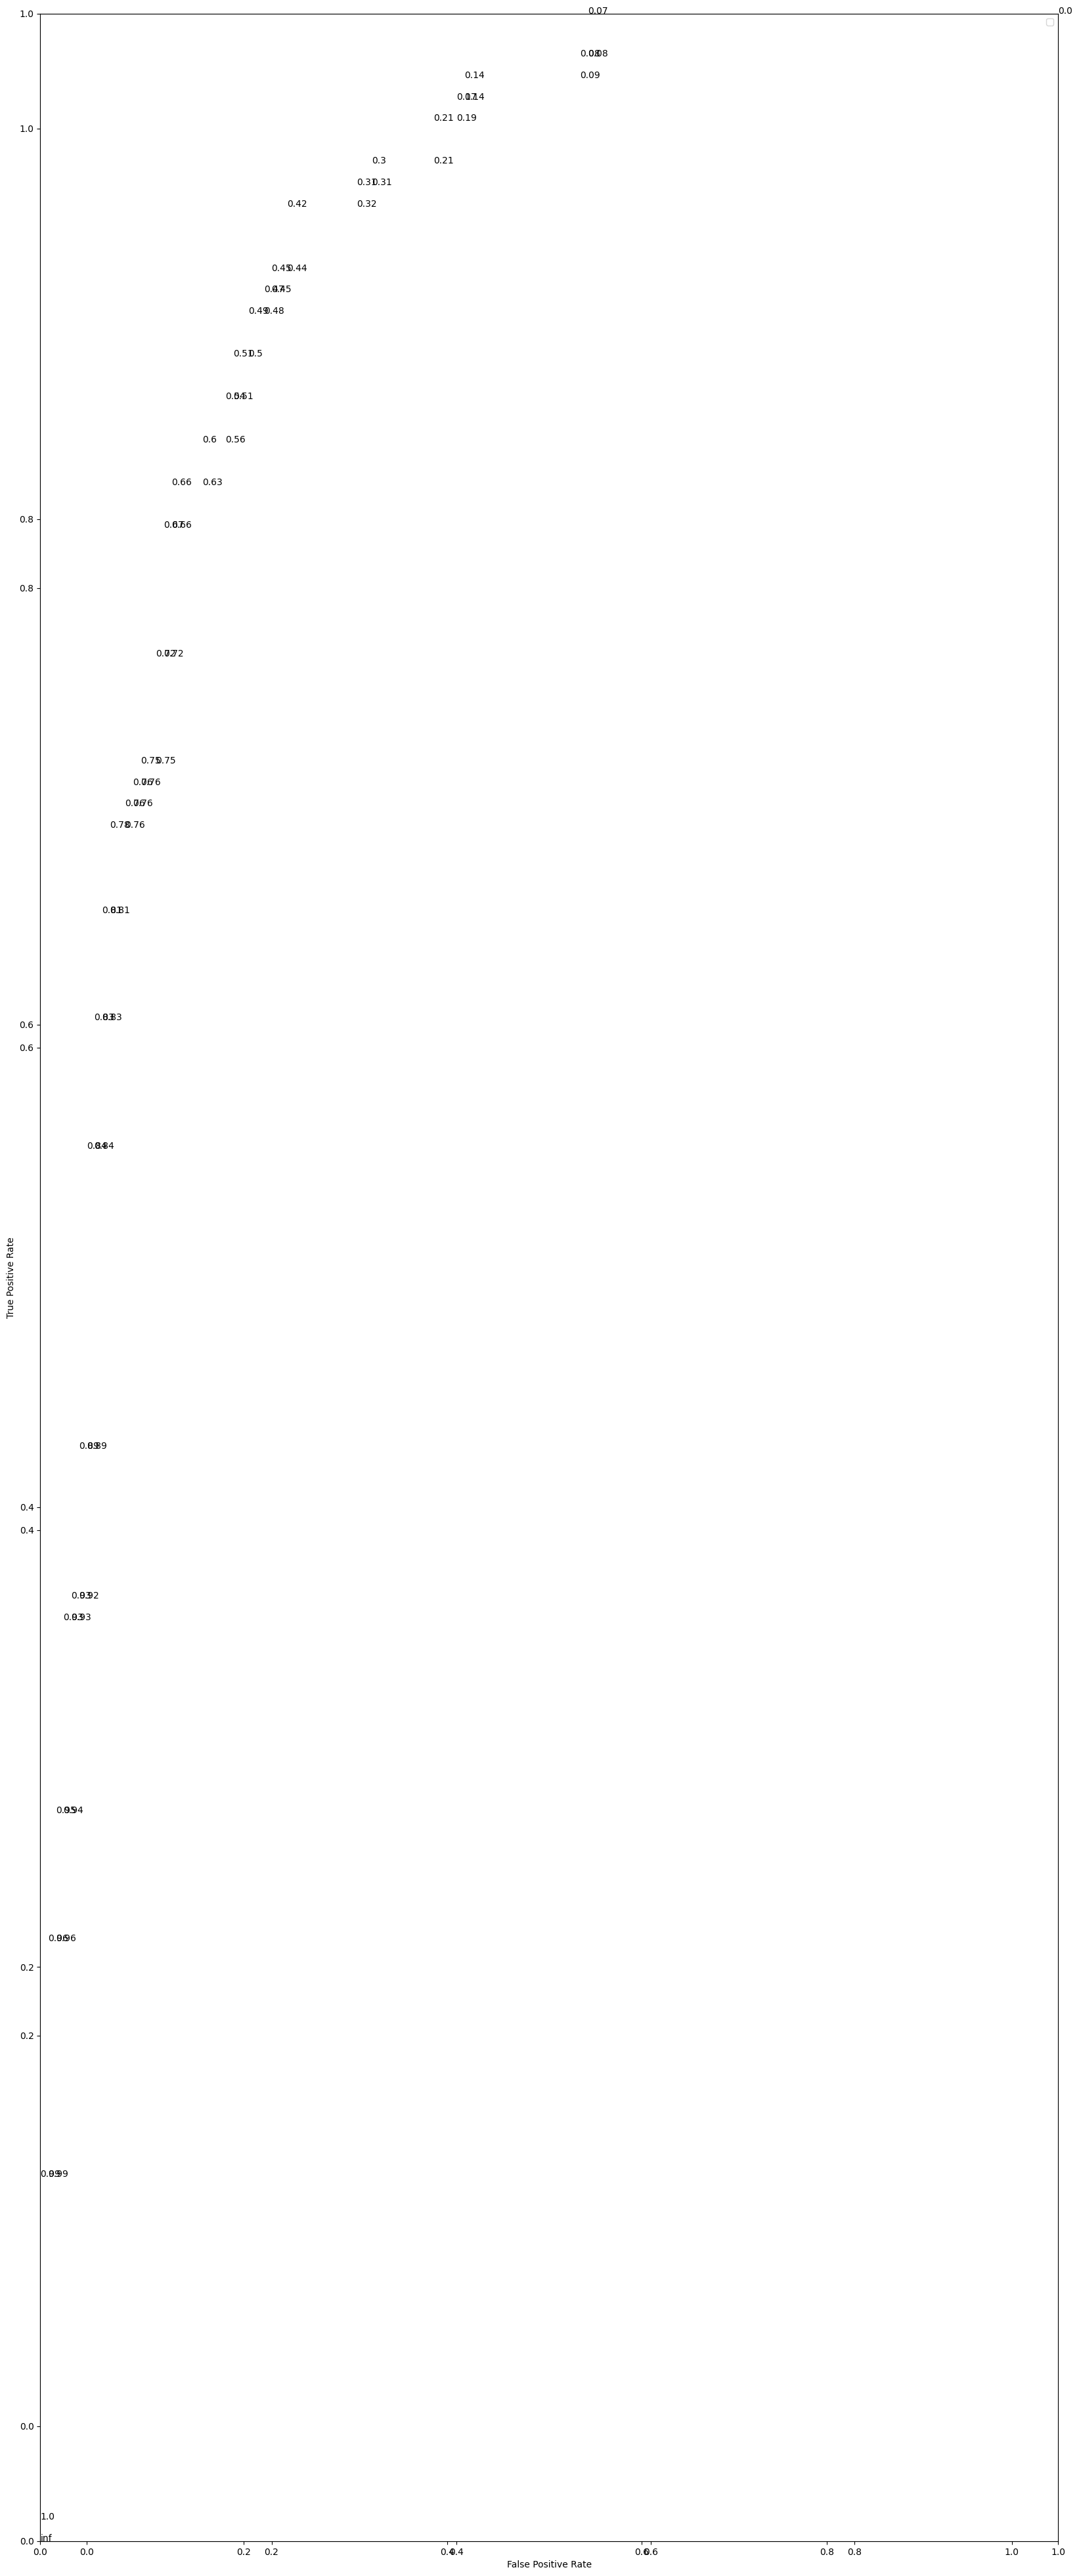

In [18]:
import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure(figsize=(20,50))
plt.plot(dummy_fpr,dummy_tpr, linestyle='--',label='Dummy Model')
plt.plot(model_fpr,model_tpr,marker='.',label='Logistic')
ax = fig.add_subplot(111)
for xyz in zip(model_fpr,model_tpr,thresholds):
  ax.annotate('%s'% np.round(xyz[2],2), xy=(xyz[0],xyz[1]))

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend()
plt.show()